In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [25]:
df = pd.read_csv('./pilot3_nonresp_inc.csv')
df_correct = df[df['resp_correct'] == 1]


In [27]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order
len(set(df['participant']))


142

In [34]:
rt = []
for rts in df['mouse.time']:
    rts = ast.literal_eval(rts)
    
    if len(rts) == 0:
        rt.append(np.NaN)
    else:
        rt.append(rts[-1])
df['RT'] = rt

0        0.985376
1        0.985376
2        0.985376
3        0.985376
4        0.985376
           ...   
42595    1.002042
42596    1.002042
42597    1.002042
42598    1.002042
42599    0.002042
Name: Accuracy, Length: 42600, dtype: float64

In [31]:
df['resp_correct_within']

0        0.985376
1        0.985376
2        0.985376
3        0.985376
4        0.985376
           ...   
42595    1.002042
42596    1.002042
42597    1.002042
42598    1.002042
42599    0.002042
Name: resp_correct_within, Length: 42600, dtype: float64

/var/folders/mk/m98131qn1s50gg8l_0k5s38wk_j504/T/ipykernel_62806/2442325200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y = 'resp_correct',


Text(42.722222222222214, 0.5, 'Initial Accuracy')

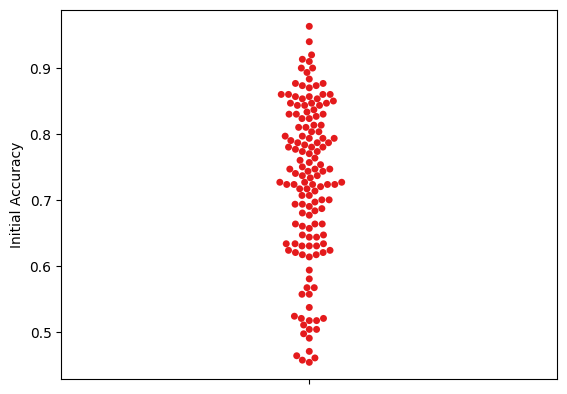

In [4]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# result = df[numeric_columns].groupby('participant').mean()
sns.swarmplot(y = 'resp_correct',
             data = df[numeric_columns].groupby('participant').mean(), palette = 'Set1')
plt.ylabel('Initial Accuracy')

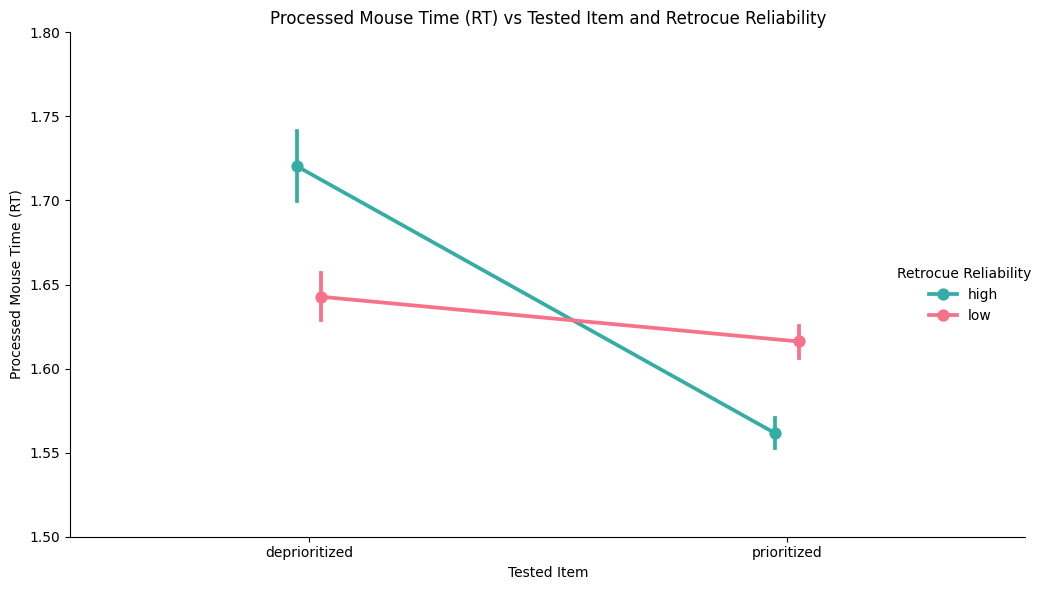

In [5]:
g = sns.catplot(x='Tested Item', y='processed_mouse.time', hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            order=['deprioritized', 'prioritized'],  # Specify the order of the categories
            palette = palette)
g.set(ylim=(1.5, 1.8))

plt.xlabel('Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested Item and Retrocue Reliability')
plt.tight_layout()
plt.show()


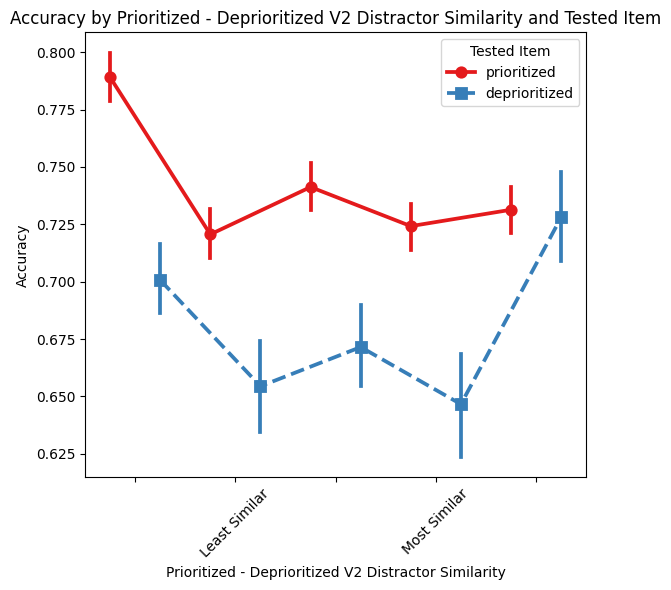

In [6]:
plt.figure(figsize=(6, 6))
sns.pointplot(data=df, 
              x='Prioritized - Deprioritized V2 Distractor Similarity', 
              y='Accuracy', 
              hue='Tested Item', 
              dodge=0.5, # Adjust dodge to ensure points for 'high' and 'low' are slightly offset for visibility
              markers=['o', 's'], # Different markers for 'high' and 'low'
              linestyles=["-", "--"], # Different line styles for 'high' and 'low'
              palette='Set1') # Color palette for differentiation

plt.title('Accuracy by Prioritized - Deprioritized V2 Distractor Similarity and Tested Item')
plt.xlabel('Prioritized - Deprioritized V2 Distractor Similarity')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)
plt.legend(title='Tested Item')
plt.tight_layout()
plt.show()


In [7]:
df['Prioritized - Deprioritized V2 Distractor Similarity'].unique()

array(['  ', 'Least Similar', ' ', 'Most Similar', '   '], dtype=object)

In [8]:
df['V2 Distractor Similarity\nto Prioritized Item'].unique()

array([' ', '  ', 'Least Similar', 'Most Similar', '   '], dtype=object)

In [9]:
print(df['V2 Distractor Similarity\nto Prioritized Item'].unique())


[' ' '  ' 'Least Similar' 'Most Similar' '   ']


Text(752.8343750000001, 0.5, 'Accuracy')

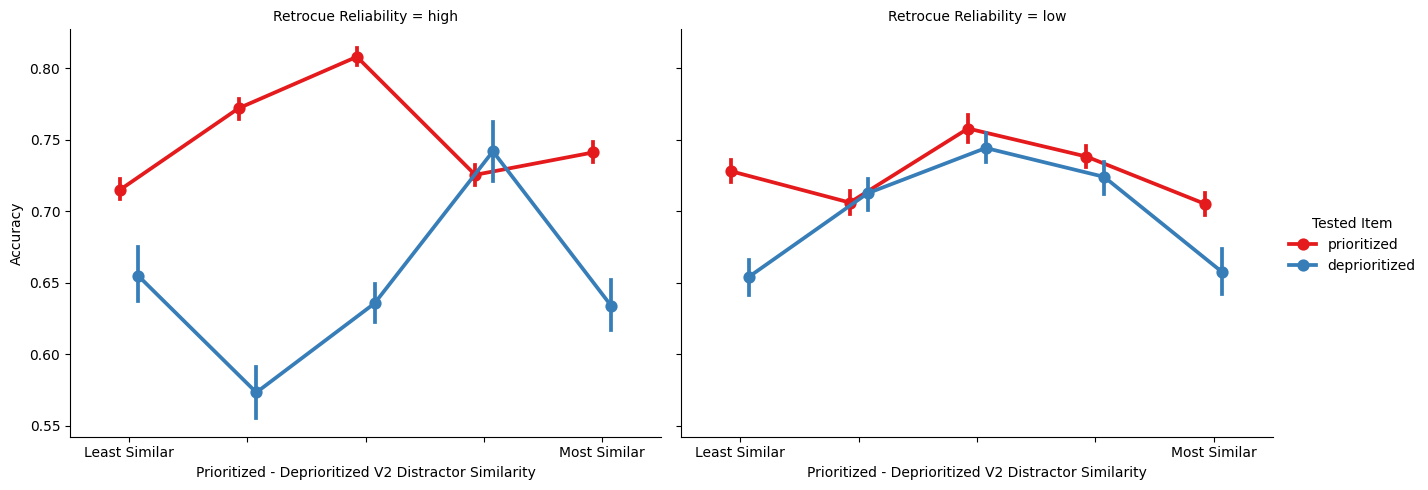

In [24]:
sns.catplot(
            x = 'Prioritized - Deprioritized V2 Distractor Similarity',# Cued - Uncued
            y = 'Accuracy',
            errorbar=('ci', 68),
            hue = 'Tested Item',
            col_order = ['high', 'low'],
            col = 'Retrocue Reliability',
            dodge = .15,
            aspect = 1.3,
            order = ['Least Similar', ' ', '  ', '   ', 'Most Similar'],
            kind = 'point',
            palette='Set1',
             data = df)
plt.ylabel('Accuracy')

In [22]:
for column, categories in category_orders.items():
    if column in df.columns:
        df[column] = pd.Categorical(
            df[column],
            categories=categories,
            ordered=True
        )
